# Setup

In [4]:
!pip install mne xlstm torcheval

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.2/179.2 kB 9.0 MB/s eta 0:00:00


In [5]:
import mne

In [6]:
dfs = []
for i in range(10):
    dfs.append((mne.io.read_raw_gdf('/kaggle/input/s02-mi/motorimagination_subject2_run'+str(i+1)+'.gdf').to_data_frame()))

Extracting EDF parameters from /kaggle/input/s02-mi/motorimagination_subject2_run1.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
F3, F1, Fz, F2, F4, FFC5h, FFC3h, FFC1h, FFC2h, FFC4h, FFC6h, FC5, FC3, FC1, FCz, FC2, FC4, FC6, FTT7h, FCC5h, FCC3h, FCC1h, FCC2h, FCC4h, FCC6h, FTT8h, C5, C3, C1, Cz, C2, C4, C6, TTP7h, CCP5h, CCP3h, CCP1h, CCP2h, CCP4h, CCP6h, TTP8h, CP5, CP3, CP1, CPz, CP2, CP4, CP6, CPP5h, CPP3h, CPP1h, CPP2h, CPP4h, CPP6h, P3, P1, Pz, P2, P4, PPO1h, PPO2h, eog-l, eog-m, eog-r, thumb_near, thumb_far, thumb_index, index_near, index_far, index_middle, middle_near, middle_far, middle_ring, ring_near, ring_far, ring_little, litte_near, litte_far, thumb_palm, wrist_bend, roll, pitch, gesture, handPosX, handPosY, handPosZ, elbowPosX, elbowPosY, elbowPosZ, ShoulderAdductio, ShoulderFlexionE, ShoulderRotation, Elbow, ProSupination, Wrist, GripPressure
Creating raw.info structure...


In [7]:
import pandas as pd

S02_MI = pd.concat(dfs)
S02_MI 

,time,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,...,elbowPosX,elbowPosY,elbowPosZ,ShoulderAdductio,ShoulderFlexionE,ShoulderRotation,Elbow,ProSupination,Wrist,GripPressure
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.007812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168443,328.990234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168444,328.992188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168445,328.994141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168446,328.996094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
S02_MI = S02_MI.drop(['thumb_near', 'thumb_far', 'thumb_index', 
                      'index_near', 'index_far', 'index_middle', 'middle_near', 'middle_far', 
                      'middle_ring', 'ring_near', 'ring_far', 'ring_little', 'litte_near', 'litte_far',
                      'thumb_palm', 'wrist_bend', 'roll', 'pitch', 'gesture'], axis=1)
S02_MI

,time,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,...,elbowPosX,elbowPosY,elbowPosZ,ShoulderAdductio,ShoulderFlexionE,ShoulderRotation,Elbow,ProSupination,Wrist,GripPressure
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.003906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.007812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168443,328.990234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168444,328.992188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168445,328.994141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168446,328.996094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
S02_MI = S02_MI.dropna()
S02_MI

,time,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,...,elbowPosX,elbowPosY,elbowPosZ,ShoulderAdductio,ShoulderFlexionE,ShoulderRotation,Elbow,ProSupination,Wrist,GripPressure
0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,6.712897e+07,1.918500e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.377780e+07,368000.000715,-312000.006437,46250.000596
1,0.001953,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,6.678427e+07,1.921629e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.349678e+07,309118.921260,-311831.950208,46004.329991
2,0.003906,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,6.656785e+07,1.923615e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.331952e+07,271920.643311,-311672.817077,45854.973354
3,0.005859,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,6.647518e+07,1.924487e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.324287e+07,255785.986503,-311549.368237,45795.371643
4,0.007812,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.0,6.649149e+07,1.924366e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.325529e+07,258328.008542,-311485.554147,45812.147109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165371,322.990234,-1.309906e+09,-1.234072e+09,-9.871940e+08,-1.577625e+09,-1.283175e+09,-1.436866e+09,-1.382666e+09,-1.182037e+09,-1.291929e+09,...,0.0,7.018950e+07,1.891306e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.624547e+07,883113.426599,-312298.056903,48588.430191
165372,322.992188,-1.308987e+09,-1.239435e+09,-9.864448e+08,-1.576991e+09,-1.287259e+09,-1.432794e+09,-1.388324e+09,-1.181946e+09,-1.287535e+09,...,0.0,6.949944e+07,1.897375e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.569243e+07,767929.925067,-312339.556964,48041.788662
165373,322.994141,-1.304499e+09,-1.238943e+09,-9.863892e+08,-1.575141e+09,-1.286608e+09,-1.432960e+09,-1.384850e+09,-1.181323e+09,-1.286715e+09,...,0.0,6.881175e+07,1.903455e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.513944e+07,652605.786553,-312330.177804,47507.783841
165374,322.996094,-1.304104e+09,-1.236657e+09,-9.879396e+08,-1.574236e+09,-1.280835e+09,-1.428526e+09,-1.382639e+09,-1.182118e+09,-1.288188e+09,...,0.0,6.816540e+07,1.909201e+08,-9.914000e+06,8.447774e+07,6.550952e+07,5.461799e+07,543725.780935,-312265.990004,47015.760825


In [10]:
df = S02_MI.copy()

In [11]:
X = df[['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h',
       'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6',
       'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h',
       'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h', 'CCP3h',
       'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3', 'CP1', 'CPz',
       'CP2', 'CP4', 'CP6', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h',
       'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h', 'eog-l',
       'eog-m', 'eog-r']]
Y = df[['Elbow', 'ProSupination', 'Wrist', 'GripPressure']]

In [12]:
from sklearn.decomposition import FastICA

ica=FastICA(random_state = 97, max_iter=800)

out_ica =ica.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [13]:
out_ica.shape

(165376, 64)

In [14]:
X = pd.DataFrame(out_ica, columns = X.columns)
X.head()

,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,FFC4h,...,P3,P1,Pz,P2,P4,PPO1h,PPO2h,eog-l,eog-m,eog-r
0,0.000551,0.002954,0.00502,-0.001628,-0.004683,0.010196,0.006409,0.014697,-0.000093,-0.001878,...,-0.013193,-0.000208,-0.00681,0.00301,-0.001299,0.000955,0.003351,0.006466,0.003762,0.002163
1,0.000551,0.002954,0.00502,-0.001628,-0.004683,0.010196,0.006409,0.014697,-0.000093,-0.001878,...,-0.013193,-0.000208,-0.00681,0.00301,-0.001299,0.000955,0.003351,0.006466,0.003762,0.002163
2,0.000551,0.002954,0.00502,-0.001628,-0.004683,0.010196,0.006409,0.014697,-0.000093,-0.001878,...,-0.013193,-0.000208,-0.00681,0.00301,-0.001299,0.000955,0.003351,0.006466,0.003762,0.002163
3,0.000551,0.002954,0.00502,-0.001628,-0.004683,0.010196,0.006409,0.014697,-0.000093,-0.001878,...,-0.013193,-0.000208,-0.00681,0.00301,-0.001299,0.000955,0.003351,0.006466,0.003762,0.002163
4,0.000551,0.002954,0.00502,-0.001628,-0.004683,0.010196,0.006409,0.014697,-0.000093,-0.001878,...,-0.013193,-0.000208,-0.00681,0.00301,-0.001299,0.000955,0.003351,0.006466,0.003762,0.002163


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

In [16]:
def plot_eeg(df, moving_avg=1):
    fig, axs = plt.subplots(20, 1, figsize=(30, 15), sharex=True)
    for i, ax in enumerate(axs):
        ax.plot(df.iloc[:,i], color="black")
        ax.set_ylabel(df.columns[i], rotation=0)
        ax.set_yticklabels([])
        ax.set_yticks([])
        ax.set_xticks([])
        ax.spines[["top", "bottom", "left", "right"]].set_visible(False)

In [17]:
X.shape

(165376, 64)

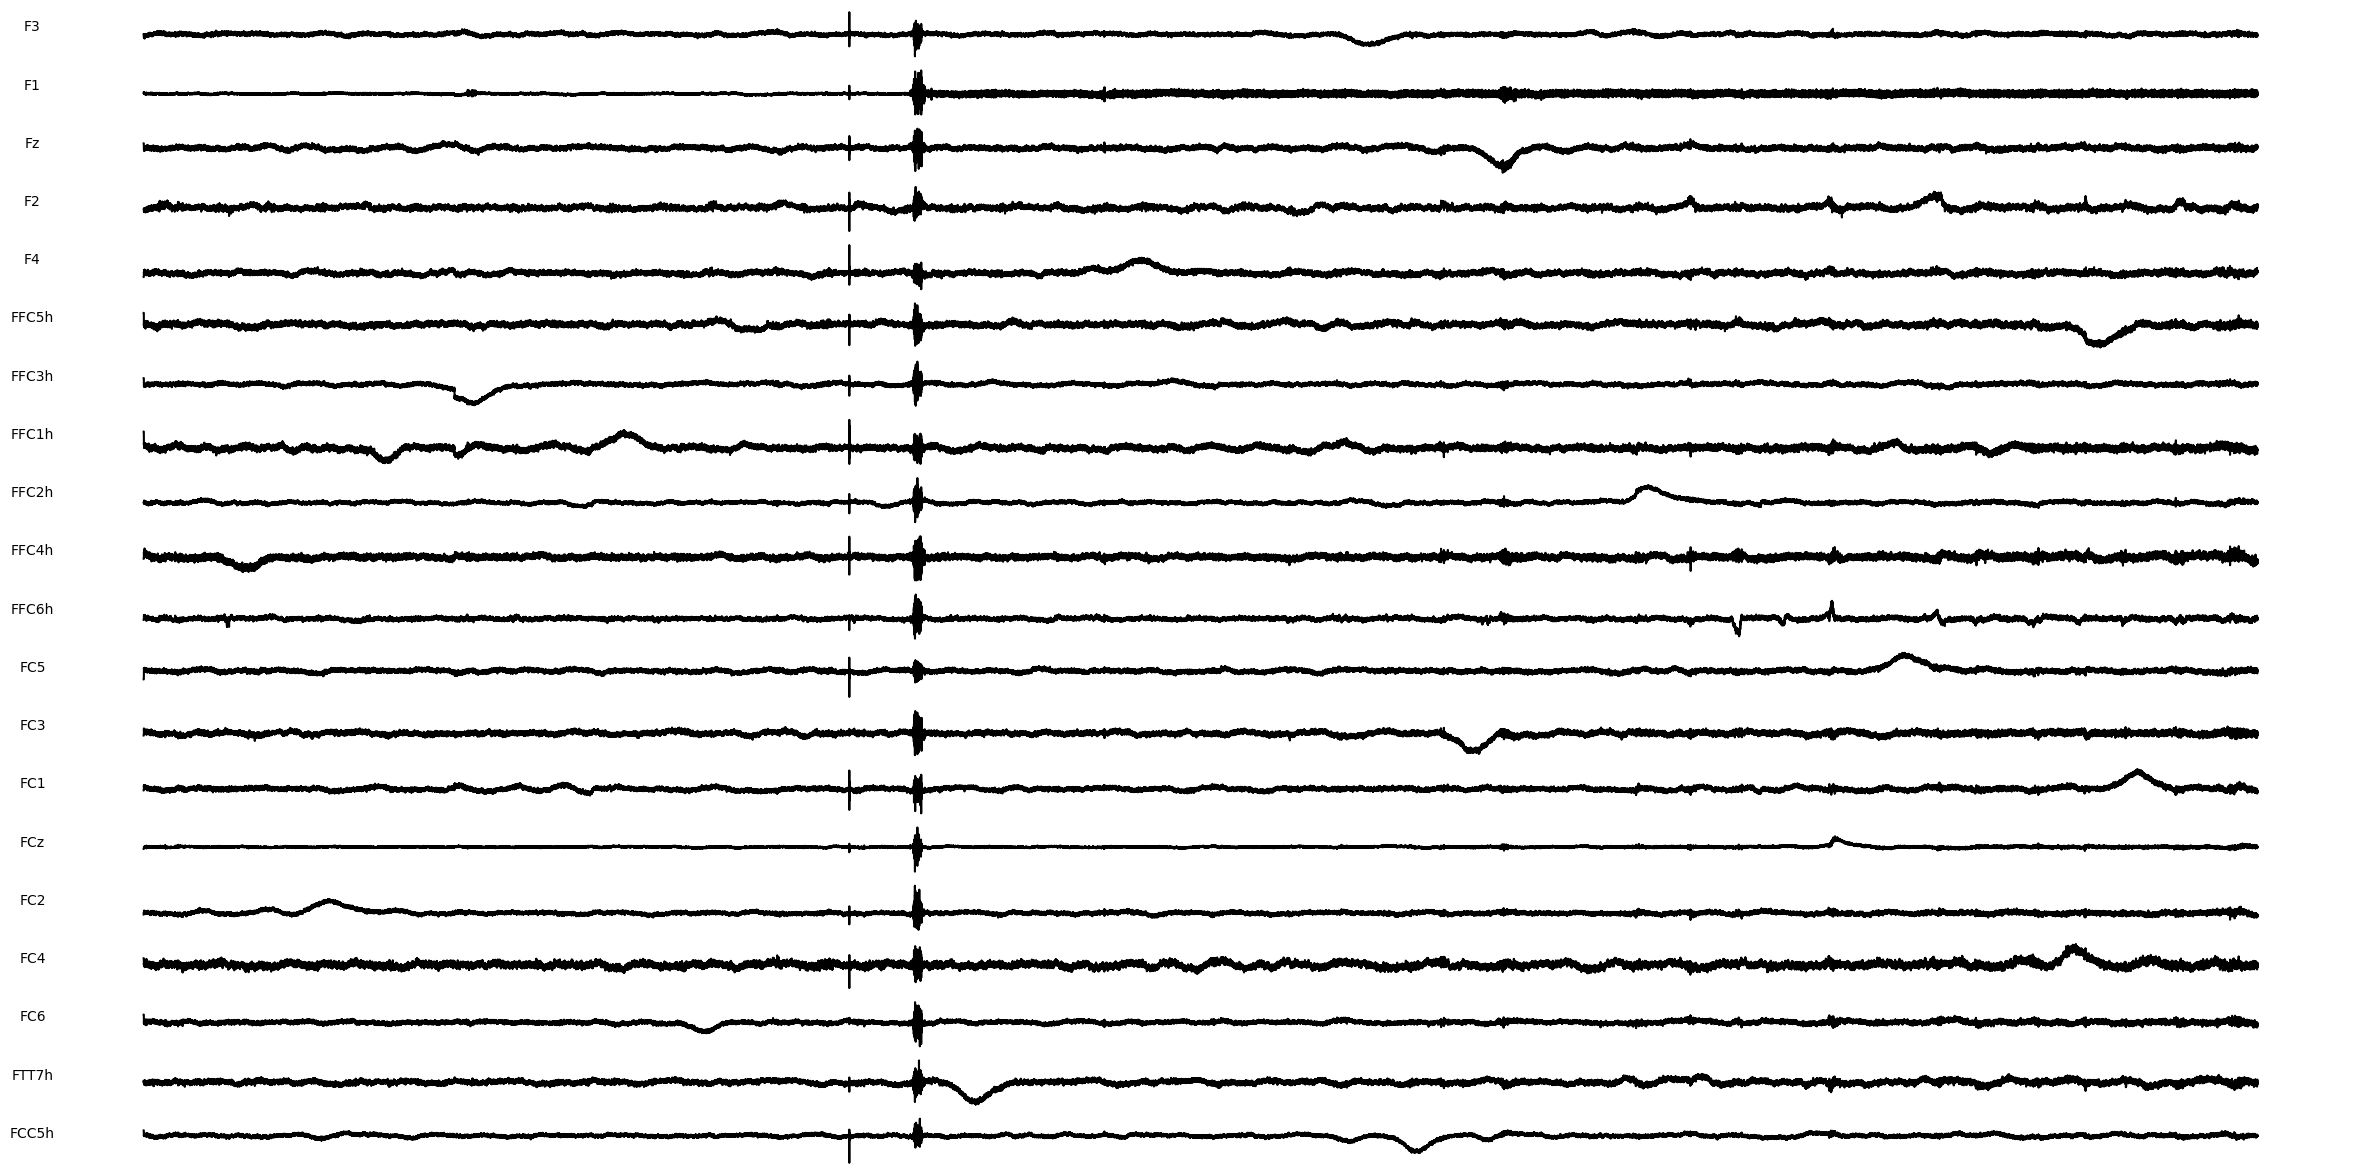

In [18]:
plot_eeg(X)

In [19]:
def maddest(d, axis=None):
    return np.mean(np.absolute(d - np.mean(d, axis)), axis)

def denoise(x, wavelet='haar', level=1):
    ret = {key:[] for key in x.columns}
    
    for pos in x.columns:
        coeff = pywt.wavedec(x[pos], wavelet, mode="per")
        sigma = (1/0.6745) * maddest(coeff[-level])

        uthresh = sigma * np.sqrt(2*np.log(len(x)))
        coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])

        ret[pos]=pywt.waverec(coeff, wavelet, mode='per')
    
    return pd.DataFrame(ret)

In [20]:
eeg_denoised = denoise(X, wavelet="db8")

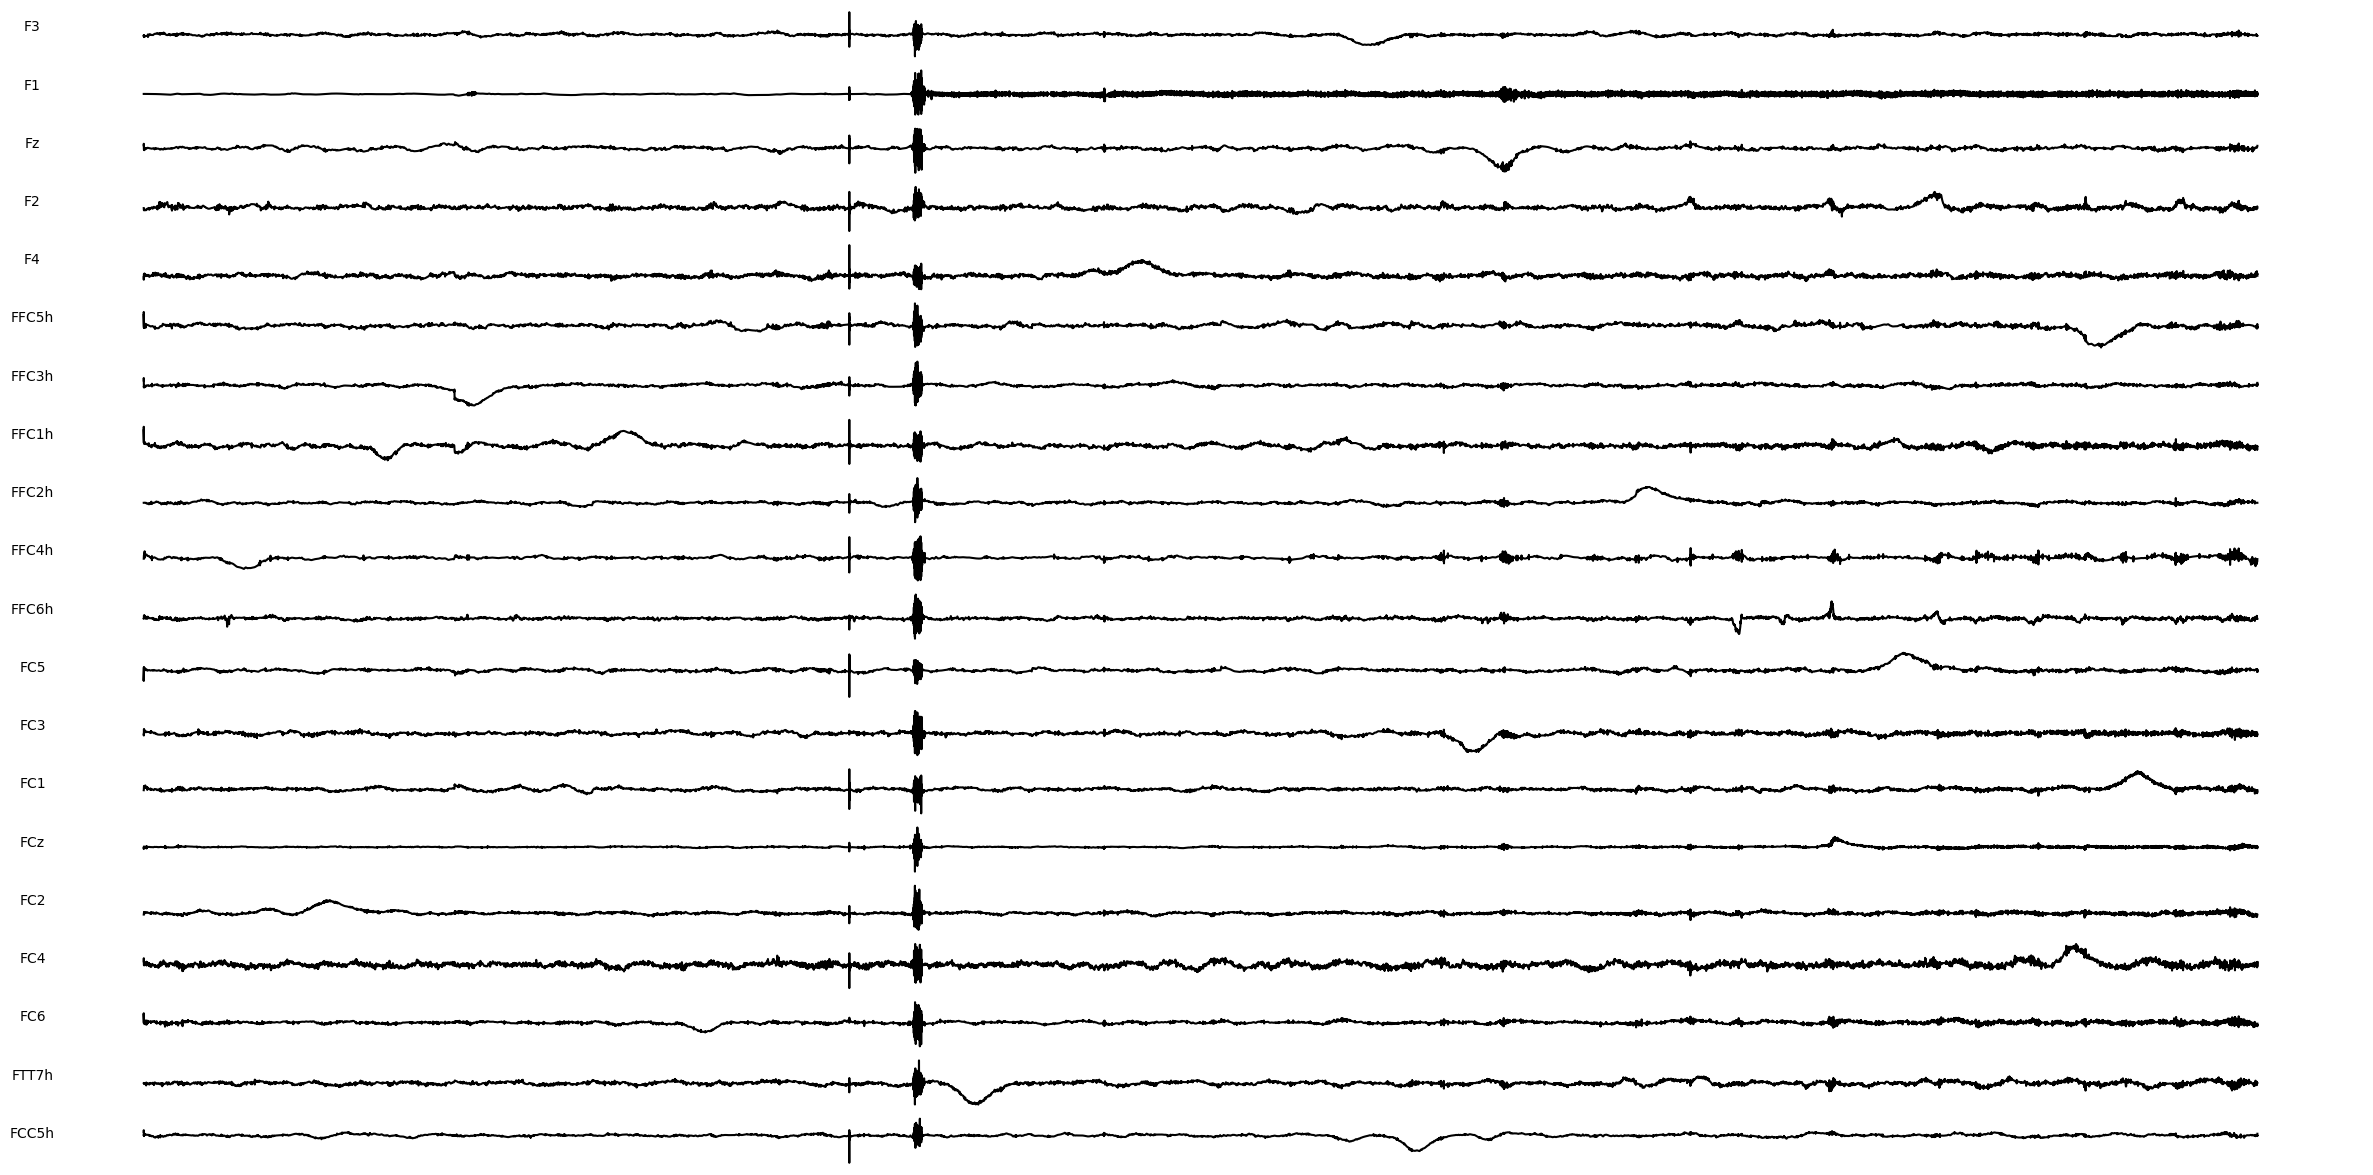

In [21]:
plot_eeg(eeg_denoised)

In [22]:
X = eeg_denoised.copy()

In [23]:
import numpy as np
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler2 = preprocessing.MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X.values), columns=X.columns, index=X.index)
Y = pd.DataFrame(scaler2.fit_transform(Y.values), columns=Y.columns, index=Y.index)

In [24]:
X

,F3,F1,Fz,F2,F4,FFC5h,FFC3h,FFC1h,FFC2h,FFC4h,...,P3,P1,Pz,P2,P4,PPO1h,PPO2h,eog-l,eog-m,eog-r
0,0.465764,0.467590,0.621759,0.519939,0.273709,0.735088,0.570171,0.762143,0.440260,0.492610,...,0.162448,0.431738,0.489064,0.490137,0.326028,0.558795,0.547655,0.519310,0.495107,0.568875
1,0.470690,0.467536,0.633697,0.514080,0.240621,0.712426,0.614656,0.722238,0.440311,0.501429,...,0.167025,0.432248,0.454681,0.490419,0.320433,0.552788,0.565988,0.576259,0.495237,0.576718
2,0.475714,0.467502,0.644985,0.508153,0.219058,0.805111,0.628652,0.843159,0.440365,0.510327,...,0.148407,0.432748,0.444419,0.490698,0.314699,0.546600,0.589825,0.588620,0.495366,0.584593
3,0.479756,0.467479,0.653579,0.502249,0.216749,0.758860,0.606537,0.801020,0.440421,0.519211,...,0.123858,0.433238,0.461411,0.490973,0.310335,0.540285,0.612989,0.556079,0.495495,0.590814
4,0.482077,0.467390,0.657841,0.496520,0.230040,0.732745,0.586811,0.780437,0.440479,0.527879,...,0.186924,0.433714,0.459434,0.491245,0.308381,0.533998,0.613957,0.551038,0.495622,0.594221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165371,0.461296,0.469929,0.590576,0.545566,0.355287,0.472705,0.465154,0.354225,0.440029,0.452637,...,0.578646,0.429068,0.519855,0.488671,0.325848,0.584349,0.504281,0.339739,0.494442,0.559571
165372,0.459761,0.469022,0.592688,0.541218,0.355180,0.447736,0.454953,0.351073,0.440071,0.459694,...,0.578075,0.429612,0.537107,0.488969,0.329258,0.580126,0.505349,0.341702,0.494577,0.557820
165373,0.459022,0.466343,0.596412,0.536388,0.348867,0.456417,0.454813,0.393147,0.440116,0.467353,...,0.526847,0.430153,0.552084,0.489265,0.331570,0.575352,0.509404,0.355407,0.494710,0.557233
165374,0.459653,0.466445,0.602446,0.531172,0.332922,0.436445,0.474903,0.386703,0.440162,0.475473,...,0.543234,0.430689,0.551083,0.489560,0.331980,0.570144,0.518102,0.390719,0.494843,0.558692


In [25]:
Y

,Elbow,ProSupination,Wrist,GripPressure
0,0.095546,0.132906,0.431506,0.530021
1,0.045353,0.079300,0.434074,0.507338
2,0.013691,0.045434,0.436505,0.493548
3,0.000000,0.030745,0.438391,0.488045
4,0.002218,0.033059,0.439366,0.489594
...,...,...,...,...
165371,0.536307,0.601869,0.426952,0.745927
165372,0.437526,0.497005,0.426318,0.695456
165373,0.338755,0.392013,0.426462,0.646151
165374,0.245616,0.292888,0.427442,0.600723


In [9]:
# S02_MI_scaled.columns

Index(['time', 'F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h',
       'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
       'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h',
       'FTT8h', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h',
       'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3',
       'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h',
       'CPP4h', 'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h',
       'eog-l', 'eog-m', 'eog-r', 'handPosX', 'handPosY', 'handPosZ',
       'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio',
       'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination',
       'Wrist', 'GripPressure'],
      dtype='object')

In [26]:
num_examples = X.shape[0]

In [27]:
window_size = 20

In [28]:
xn = X.to_numpy()
yn = Y.to_numpy()

In [29]:
yn[window_size]

array([0.06229973, 0.09515926, 0.45297584, 0.51767617])

In [30]:
xn[1:1 + window_size].shape

(20, 64)

In [32]:
from tqdm import tqdm
tqdm.pandas()

In [33]:
x_batch = []
y_batch = []
for i in tqdm(range(num_examples-window_size)):
    xcurr = xn[i:i+window_size]
    ycurr = yn[i+window_size - 1]
    x_batch.append(xcurr)
    y_batch.append(ycurr)
x_batch = np.array(x_batch)
y_batch = np.array(y_batch)

100%|██████████| 165356/165356 [00:00<00:00, 582606.91it/s]


In [34]:
x_batch.shape

(165356, 20, 64)

In [35]:
y_batch.shape

(165356, 4)

In [36]:
x_batch[:50000].shape

(50000, 20, 64)

In [37]:
import torch

In [38]:
import torch.nn as nn

In [24]:
# S02_MI_scaled.columns[1:65]

Index(['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h',
       'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6',
       'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h', 'FTT8h',
       'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h', 'CCP3h',
       'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3', 'CP1', 'CPz',
       'CP2', 'CP4', 'CP6', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h', 'CPP4h',
       'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h', 'eog-l',
       'eog-m', 'eog-r'],
      dtype='object')

In [25]:
# S02_MI_scaled.columns[74:79]

Index(['Elbow', 'ProSupination', 'Wrist', 'GripPressure'], dtype='object')

In [26]:
# print(S02_MI_scaled.columns)
# print(S02_MI_scaled.columns[1:62])
# print(S02_MI_scaled.columns[71:75])

Index(['time', 'F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h',
       'FFC2h', 'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
       'FC6', 'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', 'FCC6h',
       'FTT8h', 'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'TTP7h', 'CCP5h',
       'CCP3h', 'CCP1h', 'CCP2h', 'CCP4h', 'CCP6h', 'TTP8h', 'CP5', 'CP3',
       'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'CPP5h', 'CPP3h', 'CPP1h', 'CPP2h',
       'CPP4h', 'CPP6h', 'P3', 'P1', 'Pz', 'P2', 'P4', 'PPO1h', 'PPO2h',
       'eog-l', 'eog-m', 'eog-r', 'handPosX', 'handPosY', 'handPosZ',
       'elbowPosX', 'elbowPosY', 'elbowPosZ', 'ShoulderAdductio',
       'ShoulderFlexionE', 'ShoulderRotation', 'Elbow', 'ProSupination',
       'Wrist', 'GripPressure'],
      dtype='object')
Index(['F3', 'F1', 'Fz', 'F2', 'F4', 'FFC5h', 'FFC3h', 'FFC1h', 'FFC2h',
       'FFC4h', 'FFC6h', 'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6',
       'FTT7h', 'FCC5h', 'FCC3h', 'FCC1h', 'FCC2h', 'FCC4h', '

In [27]:
# X = S02_MI_scaled.iloc[:, 1:65].values
# y = S02_MI_scaled.iloc[:, 74:79].values

# X.shape, y.shape

((165376, 64), (165376, 4))

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_batch, y_batch, test_size=0.2, random_state=0)
# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((132284, 20, 64), (33072, 20, 64), (132284, 4), (33072, 4))

In [40]:
num_units = 100
window_size = 20
num_epochs = 10

In [41]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:
device

device(type='cuda')

In [43]:
input_size = 64
sequence_length = 20
num_layers = 2
hidden_size = 100
output_size = 4

In [44]:
from xlstm import (
    xLSTMBlockStack,
    xLSTMBlockStackConfig,
    mLSTMBlockConfig,
    mLSTMLayerConfig,
    sLSTMBlockConfig,
    sLSTMLayerConfig,
    FeedForwardConfig,
)

In [45]:
mlstm_config = mLSTMBlockConfig()

# for cpu
# slstm_config = sLSTMBlockConfig()

# for gpu
slstm_config = sLSTMBlockConfig(slstm=sLSTMLayerConfig(
            backend="cuda"
        ))


cfg = xLSTMBlockStackConfig(
        mlstm_block=mlstm_config,
        slstm_block=slstm_config,
        num_blocks=3,
        embedding_dim=input_size,
        add_post_blocks_norm=True,
        
        _block_map = 1,
        context_length=sequence_length
    )


In [46]:
class TestModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TestModel, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.output_size = output_size
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
        self.xlstm = xLSTMBlockStack(cfg)
        # x -> (batch_size, sequence_length, input_size)
        self.fc = nn.Linear(input_size,output_size)
        self.tanh = nn.Tanh()
    def forward(self, x):
        out = self.xlstm(x)
        # x -> (batch_size, sequence_length, hidden_size)
        out = self.tanh(out)
        out = out[:,-1,:]
        out = self.fc(out)
        return out

In [36]:
# input_size = 64
# sequence_length = 20
# num_layers = 2
# hidden_size = 100
# output_size = 4

# class TestModel(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size):
#         super(TestModel, self).__init__()
#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.output_size = output_size
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True)
#         # x -> (batch_size, sequence_length, input_size)
#         self.fc = nn.Linear(hidden_size,output_size)
#         self.tanh = nn.Tanh()
#     def forward(self, x):
#         out, _ = self.lstm(x)
#         # x -> (batch_size, sequence_length, hidden_size)
#         out = self.tanh(out)
#         out = out[:,-1,:]
#         out = self.fc(out)
#         return out

In [47]:
model = TestModel(input_size, hidden_size, num_layers, output_size).to(device)

In [48]:
learning_rate=0.0001

In [49]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [50]:
num_epochs = 20

In [51]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test)

In [52]:
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

In [53]:
X_train = X_train.float()
y_train = y_train.float()
X_test = X_test.float()
y_test = y_test.float()

In [54]:
X_train.shape[0]

132284

In [55]:
import torch.utils.data as data

In [56]:
loader = data.DataLoader(data.TensorDataset(X_train, y_train), shuffle=True, batch_size=32)

In [57]:
from tqdm import tqdm

In [58]:
from torcheval.metrics import R2Score
metric = R2Score()

In [59]:
testLoader = data.DataLoader(data.TensorDataset(X_test, y_test), shuffle=True, batch_size=32)

In [60]:
for epoch in tqdm(range(num_epochs)):
    model.train()
    for X_batch, y_batch in tqdm(loader):
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    totalYPred = []
    totalY = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            totalY.append(y_batch)
            totalYPred.append(model(X_batch))
    actualY = torch.cat(totalY, 0)
    predY = torch.cat(totalYPred, 0)
    metric = R2Score()
    metric.update(predY, actualY)
    train_r2 = metric.compute()
    print("Epoch %d: train R2 %.4f," % (epoch, train_r2), end="")
    
    totalYPred = []
    totalY = []
    with torch.no_grad():
        for X_batch, y_batch in testLoader:
            totalY.append(y_batch)
            totalYPred.append(model(X_batch))
    actualY = torch.cat(totalY, 0)
    predY = torch.cat(totalYPred, 0)
    metric = R2Score()
    metric.update(predY, actualY)
    test_r2 = metric.compute()
    print(" test R2 %.4f" % (test_r2))
    del totalYPred
    del totalY
    del actualY
    del predY
#     with torch.no_grad():
# #         y_pred = model(X_train)
# #         train_rmse = np.sqrt(criterion(y_pred, y_train))
#         train_rmse = -1
#         y_pred = model(X_test)
#         test_rmse = np.sqrt(criterion(y_pred, y_test))
#     print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

100%|██████████| 4134/4134 [01:23<00:00, 49.81it/s]


Epoch 0: train R2 0.6762,

  5%|▌         | 1/20 [01:56<36:45, 116.07s/it]

 test R2 0.6755



100%|██████████| 4134/4134 [01:26<00:00, 47.85it/s]


Epoch 1: train R2 0.7055,

 10%|█         | 2/20 [03:54<35:10, 117.27s/it]

 test R2 0.7036



100%|██████████| 4134/4134 [01:26<00:00, 47.66it/s]


Epoch 2: train R2 0.7228,

 15%|█▌        | 3/20 [05:52<33:23, 117.84s/it]

 test R2 0.7196



100%|██████████| 4134/4134 [01:26<00:00, 47.64it/s]


Epoch 3: train R2 0.7333,

 20%|██        | 4/20 [07:51<31:29, 118.11s/it]

 test R2 0.7287



100%|██████████| 4134/4134 [01:26<00:00, 47.61it/s]


Epoch 4: train R2 0.7450,

 25%|██▌       | 5/20 [09:49<29:34, 118.27s/it]

 test R2 0.7395



100%|██████████| 4134/4134 [01:26<00:00, 47.77it/s]


Epoch 5: train R2 0.7513,

 30%|███       | 6/20 [11:48<27:36, 118.31s/it]

 test R2 0.7447



100%|██████████| 4134/4134 [01:26<00:00, 47.78it/s]


Epoch 6: train R2 0.7630,

 35%|███▌      | 7/20 [13:46<25:37, 118.26s/it]

 test R2 0.7553



100%|██████████| 4134/4134 [01:26<00:00, 47.83it/s]


Epoch 7: train R2 0.7693,

 40%|████      | 8/20 [15:44<23:38, 118.18s/it]

 test R2 0.7607



100%|██████████| 4134/4134 [01:26<00:00, 47.82it/s]


Epoch 8: train R2 0.7801,

 45%|████▌     | 9/20 [17:42<21:39, 118.15s/it]

 test R2 0.7706



100%|██████████| 4134/4134 [01:26<00:00, 47.93it/s]


Epoch 9: train R2 0.7832,

 50%|█████     | 10/20 [19:40<19:41, 118.12s/it]

 test R2 0.7740



100%|██████████| 4134/4134 [01:26<00:00, 47.96it/s]


Epoch 10: train R2 0.7924,

 55%|█████▌    | 11/20 [21:38<17:42, 118.03s/it]

 test R2 0.7815



100%|██████████| 4134/4134 [01:26<00:00, 47.79it/s]


Epoch 11: train R2 0.7914,

 60%|██████    | 12/20 [23:36<15:44, 118.05s/it]

 test R2 0.7782



100%|██████████| 4134/4134 [01:26<00:00, 47.80it/s]


Epoch 12: train R2 0.8025,

 65%|██████▌   | 13/20 [25:34<13:46, 118.05s/it]

 test R2 0.7894



100%|██████████| 4134/4134 [01:26<00:00, 47.99it/s]


Epoch 13: train R2 0.8107,

 70%|███████   | 14/20 [27:32<11:47, 117.97s/it]

 test R2 0.7981



100%|██████████| 4134/4134 [01:26<00:00, 47.83it/s]


Epoch 14: train R2 0.8173,

 75%|███████▌  | 15/20 [29:30<09:49, 118.00s/it]

 test R2 0.8021



100%|██████████| 4134/4134 [01:26<00:00, 47.86it/s]


Epoch 15: train R2 0.8220,

 80%|████████  | 16/20 [31:28<07:51, 117.95s/it]

 test R2 0.8069



100%|██████████| 4134/4134 [01:26<00:00, 47.92it/s]


Epoch 16: train R2 0.8238,

 85%|████████▌ | 17/20 [33:25<05:53, 117.87s/it]

 test R2 0.8102



100%|██████████| 4134/4134 [01:26<00:00, 47.92it/s]


Epoch 17: train R2 0.8303,

 90%|█████████ | 18/20 [35:23<03:55, 117.85s/it]

 test R2 0.8143



100%|██████████| 4134/4134 [01:26<00:00, 47.94it/s]


Epoch 18: train R2 0.8345,

 95%|█████████▌| 19/20 [37:21<01:57, 117.82s/it]

 test R2 0.8186



100%|██████████| 4134/4134 [01:26<00:00, 47.95it/s]


Epoch 19: train R2 0.8341,

100%|██████████| 20/20 [39:19<00:00, 117.96s/it]

 test R2 0.8188


# Train R2 0.8341, Test R2 0.8188

In [ ]:
torch.save(model.state_dict(), '/kaggle/working/xlstm.model')

In [ ]:
torch.save(model, '/kaggle/working/entireModel.model')

In [ ]:
from torcheval.metrics import R2Score
metric = R2Score()

In [ ]:
totalYPred = []
totalY = []
with torch.no_grad():
    for X_batch, y_batch in tqdm(loader):
        totalY.append(y_batch)
        totalYPred.append(model(X_batch))

In [ ]:
actualY = torch.cat(totalY, 0)
predY = torch.cat(totalYPred, 0)

In [ ]:
metric.update(predY, actualY)
metric.compute()

In [ ]:
testLoader = data.DataLoader(data.TensorDataset(X_test, y_test), shuffle=True, batch_size=8)

In [ ]:
totalYPred = []
totalY = []
with torch.no_grad():
    for X_batch, y_batch in tqdm(testLoader):
        totalY.append(y_batch)
        totalYPred.append(model(X_batch))
actualY = torch.cat(totalY, 0)
predY = torch.cat(totalYPred, 0)
metric.update(predY, actualY)
metric.compute()

In [ ]:
model.eval()